# Importacion de bibliotecas y configuracion de graficas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

#Modelos Supervisados (Regresión)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

#Modelos Supervisados (Clasificación)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Modelos No Supervisados (Clustering)
from sklearn.cluster import KMeans, DBSCAN

#Series de Tiempo
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Configuración de gráficas
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
palette = sns.color_palette("viridis", as_cmap=False)
warnings.filterwarnings('ignore')

#Carga de datos

In [ ]:
df = pd.read_csv('melb_data.csv')
print(f"Dimensiones del dataset: {df.shape}")
df.head()

Dimensiones del dataset: (13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Analisis exploratorio de datos

In [ ]:
print("\nInformación de tipos de datos")
df.info()


Información de tipos de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      1358

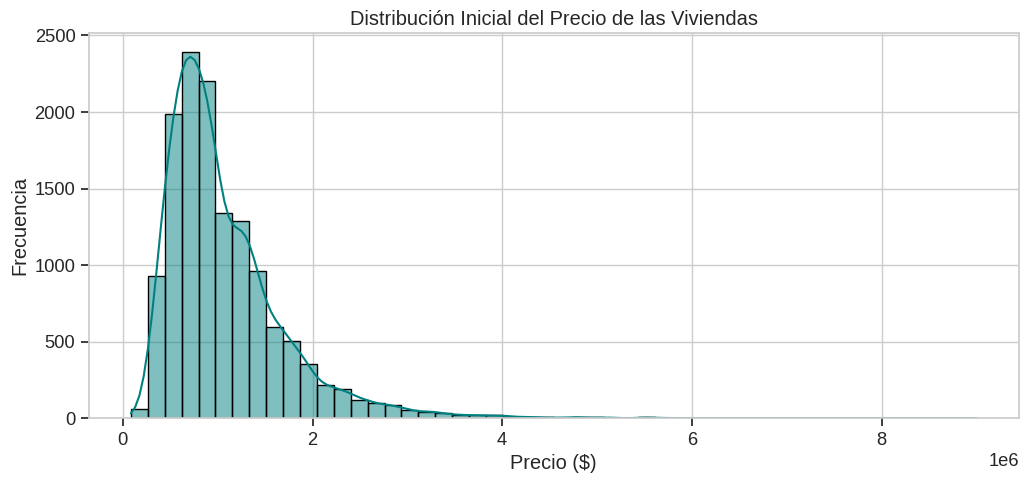

In [ ]:
#Gráfica de distribución del precio
plt.figure(figsize=(12, 5))
sns.histplot(df['Price'], kde=True, bins=50, color='teal')
plt.title('Distribución Inicial del Precio de las Viviendas')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

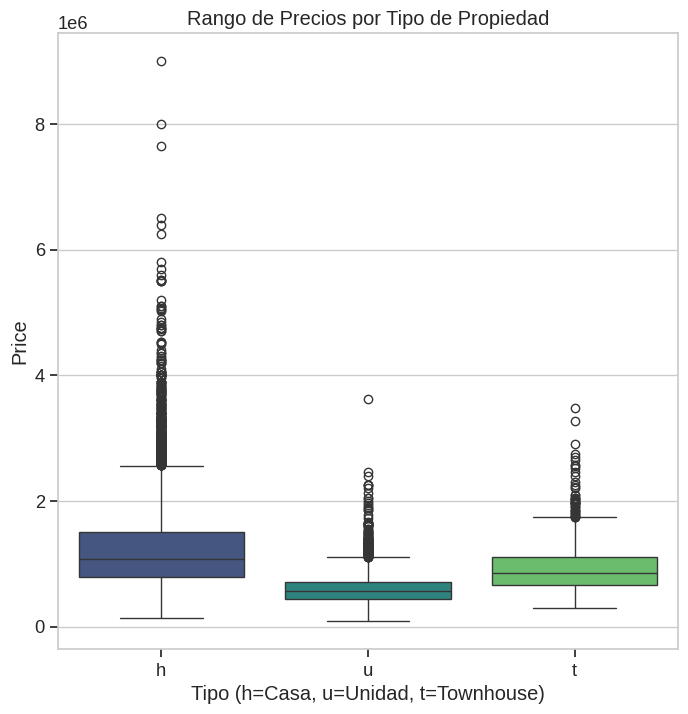

In [ ]:
#Boxplot: Precio vs Tipo de Casa
#h = house, u = unit, t = townhouse
plt.figure(figsize=(8, 8))
sns.boxplot(x='Type', y='Price', data=df, palette='viridis')
plt.title('Rango de Precios por Tipo de Propiedad')
plt.xlabel('Tipo (h=Casa, u=Unidad, t=Townhouse)')
plt.show()

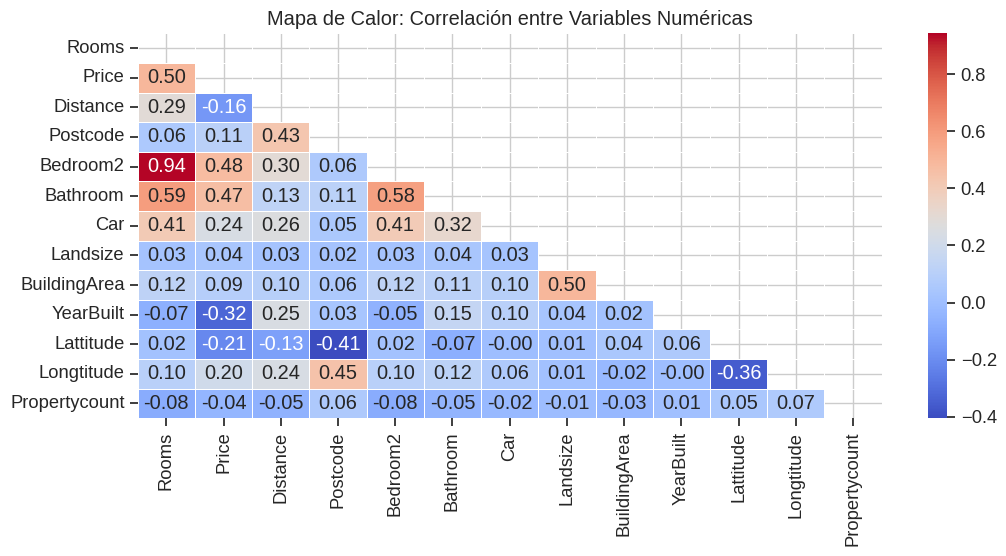

In [ ]:
#Mapa de Calor de Correlaciones
plt.figure(figsize=(12, 5))
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, linewidths=0.5)
plt.title('Mapa de Calor: Correlación entre Variables Numéricas')
plt.show()


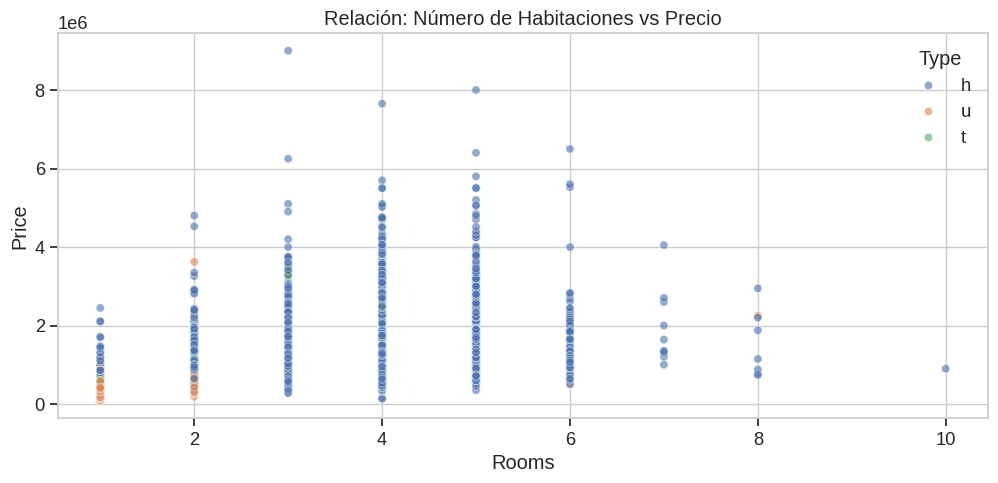

In [ ]:
#Scatterplot: Habitaciones vs Precio
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Rooms', y='Price', data=df, hue='Type', alpha=0.6, palette='deep')
plt.title('Relación: Número de Habitaciones vs Precio')
plt.show()

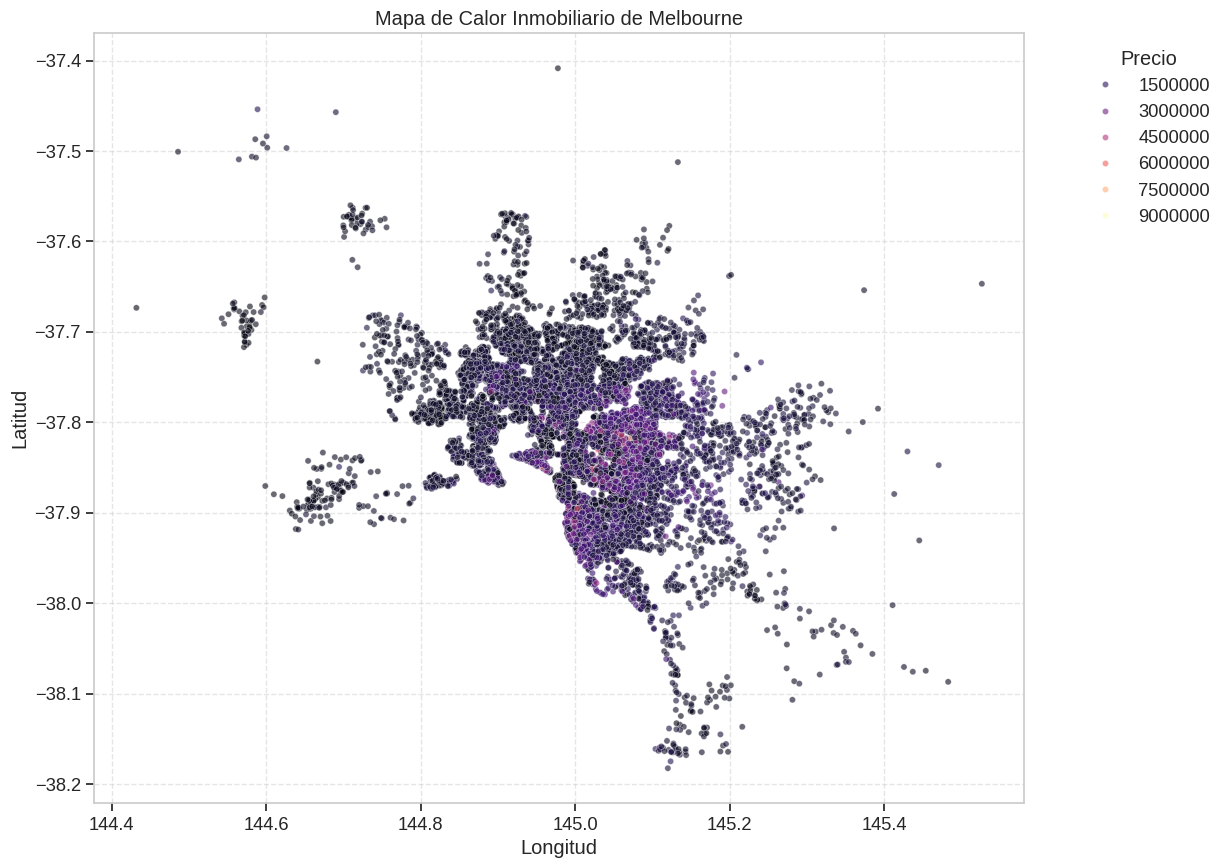

In [ ]:
#Mapa Geográfico de Precios
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Longtitude', y='Lattitude', data=df, hue='Price', palette='magma', alpha=0.6, s=20)

plt.title('Mapa de Calor Inmobiliario de Melbourne')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Precio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#Preprocesamiento de datos

## Manejo de datos faltantes

In [ ]:
# Ver nulos
nulls = df.isnull().sum()
print("Nulos antes de imputar:\n", nulls[nulls > 0])

Nulos antes de imputar:
 Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64


In [ ]:
#Estrategias de imputación

#Numéricos: Mediana
imputer_median = SimpleImputer(strategy='median')
cols_num_impute = ['Car', 'BuildingArea', 'YearBuilt', 'Landsize']

#Categóricos: Moda
imputer_mode = SimpleImputer(strategy='most_frequent')
cols_cat_impute = ['CouncilArea']

#Aplicamos imputación
for col in cols_num_impute:
    if col in df.columns:
        df[col] = imputer_median.fit_transform(df[[col]])

df[cols_cat_impute] = imputer_mode.fit_transform(df[cols_cat_impute])

#Eliminamos filas donde el precio o coordenadas sean nulos
df.dropna(subset=['Price', 'Lattitude', 'Longtitude'], inplace=True)
print("\nNulos restantes despues de la imputación:", df.isnull().sum().sum())


Nulos restantes despues de la imputación: 0


## Tratamiento de outliers

In [ ]:
def detectar_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

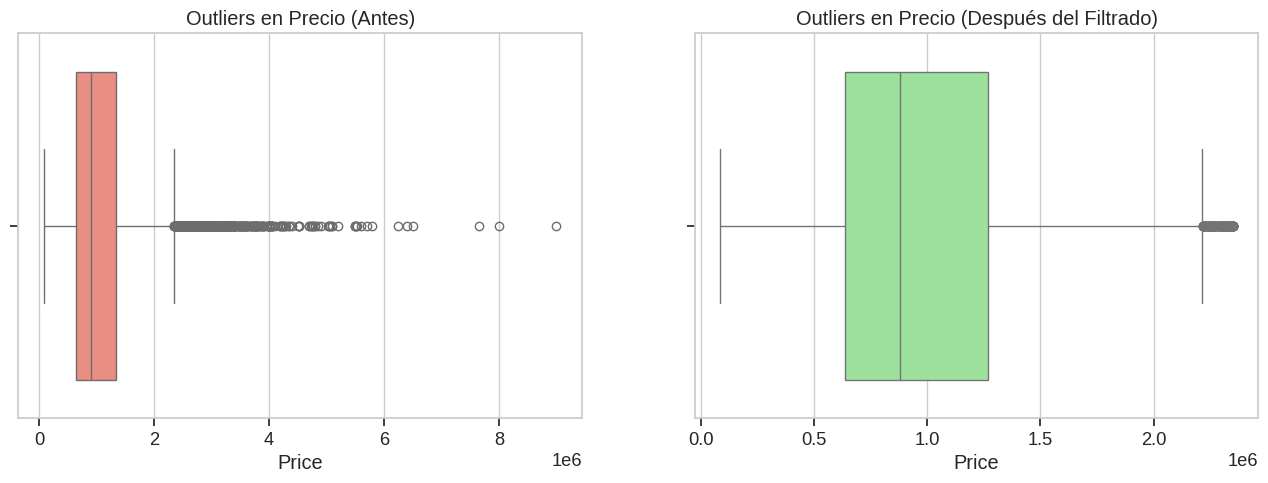

Registros originales: 13580 -> Registros limpios: 12968


In [ ]:
#Usamos la regla del rango intercuartilico
lb, ub = detectar_outliers_iqr(df, 'Price')

#Visualización Antes vs Después de eliminar ouliers
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

#Antes
sns.boxplot(x=df['Price'], ax=axes[0], color='salmon')
axes[0].set_title('Outliers en Precio (Antes)')

#Filtrado
df_clean = df[(df['Price'] >= lb) & (df['Price'] <= ub)].copy()

#Después
sns.boxplot(x=df_clean['Price'], ax=axes[1], color='lightgreen')
axes[1].set_title('Outliers en Precio (Después del Filtrado)')
plt.show()

print(f"Registros originales: {len(df)} -> Registros limpios: {len(df_clean)}")

## Manejo de datos categóricos

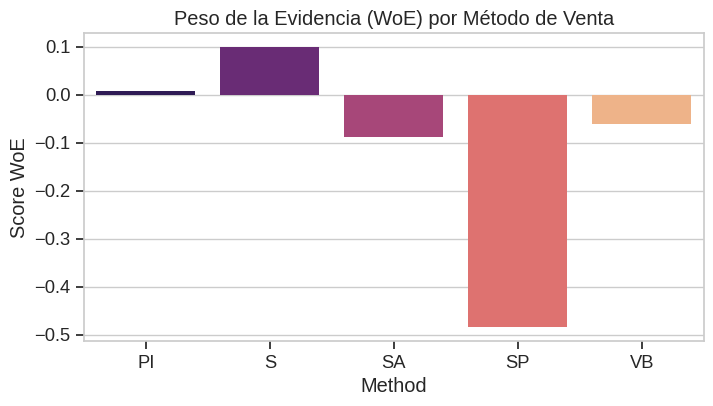

In [ ]:
#De las fechas extraer año y mes
df_clean['Date'] = pd.to_datetime(df_clean['Date'], dayfirst=True)
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

#Uso de one-hot encoding para 'Type' (variable nominal)
df_clean = pd.get_dummies(df_clean, columns=['Type'], prefix='Type', drop_first=True)

#Label Encoding para 'Regionname' (variable ordinal)
le = LabelEncoder()
df_clean['Region_Code'] = le.fit_transform(df_clean['Regionname'])

#Hashing para 'Suburb' (reducción de alta dimensionalidad)
#Transformamos cientos de suburbios en 50 "cubetas" numéricas
def simple_hash(text, n_buckets=50):
    return hash(text) % n_buckets
df_clean['Suburb_Hash'] = df_clean['Suburb'].apply(lambda x: simple_hash(x, 50))

#WoE (Weight of Evidence) para 'Method'
#Calculamos qué tanto influye el método de venta en si el precio es alto o bajo
median_price = df_clean['Price'].median()
df_clean['Target_Binary'] = (df_clean['Price'] > median_price).astype(int)

woe_df = df_clean.groupby('Method')['Target_Binary'].agg(['count', 'sum'])
woe_df['good'] = woe_df['sum'] / woe_df['sum'].sum() # % Caros
woe_df['bad'] = (woe_df['count'] - woe_df['sum']) / (woe_df['count'] - woe_df['sum']).sum() # % Baratos
woe_df['WoE'] = np.log(woe_df['good'] / (woe_df['bad'] + 1e-5)) # +1e-5 evita división por 0

df_clean['Method_WoE'] = df_clean['Method'].map(woe_df['WoE'])

# Gráfica del WoE
plt.figure(figsize=(8, 4))
sns.barplot(x=woe_df.index, y=woe_df['WoE'], palette='magma')
plt.title('Peso de la Evidencia (WoE) por Método de Venta')
plt.ylabel('Score WoE')
plt.show()

## Selección de características y escalamiento de datos

In [ ]:
#Lista de variables a elminar debido a que generan mucho ruido, redundancia o ya se procesaron
cols_to_drop = [
    'Address',      #Texto único y no aporta valor predictivo directo
    'Postcode',     #Redundante con región y coordenadas
    'Bedroom2',     #Alta correlacion con 'Rooms' (corr > 0.9)
    'SellerG',      #Demasiados valores únicos, no la usaremos
    'Date',         #Ya extrajimos Year y Month
    'CouncilArea',  #Ya se usó para imputar, pero tiene demasiadas categorías para el modelo
    'Regionname',   #Ya hicimos Label Encoding (Region_Code)
    'Suburb',       #Ya hicimos Hashing (Suburb_Hash)
    'Method',       #Ya hicimos WoE (Method_WoE)
    'Propertycount',#Es redundante ya tenemos la información ya cubierta
    'Target_Binary',
]

X = df_clean.drop(columns = cols_to_drop)

print(f"Variables eliminadas: {len(cols_to_drop)}")
print(f"Variables finales ({X.shape[1]})")
X.head(15)

Variables eliminadas: 11
Variables finales (17)


,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Year,Month,Type_t,Type_u,Region_Code,Suburb_Hash,Method_WoE
0,2,1480000.0,2.5,1.0,1.0,202.0,126.0,1970.0,-37.7996,144.9984,2016,12,False,False,2,28,0.099086
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,2016,2,False,False,2,28,0.099086
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,2017,3,False,False,2,28,-0.484852
3,3,850000.0,2.5,2.0,1.0,94.0,126.0,1970.0,-37.7969,144.9969,2017,3,False,False,2,28,0.008130
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,2016,6,False,False,2,28,-0.061288
5,2,941000.0,2.5,1.0,0.0,181.0,126.0,1970.0,-37.8041,144.9953,2016,5,False,False,2,28,0.099086
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,2016,5,False,False,2,28,0.099086
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,2016,10,False,False,2,28,0.099086
8,1,300000.0,2.5,1.0,1.0,0.0,126.0,1970.0,-37.8008,144.9973,2016,10,False,True,2,28,0.099086
9,2,1097000.0,2.5,1.0,2.0,220.0,75.0,1900.0,-37.8010,144.9989,2016,10,False,False,2,28,0.099086


In [ ]:
X.to_csv('dataset_procesado.csv', index=False)

In [ ]:
y = X['Price']
X = X.drop(columns=['Price'])
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Modelos implementados desde 0

## Regresión Lineal

In [ ]:
class LinearRegressionPropio:
    def __init__(self):
        self.weights = None
        self.intercept = None

    def fit(self, X, y):
        """
        Entrena el modelo usando la Ecuación Normal: b = (X.T * X)^-1 * X.T * y
        """
        X = np.array(X)
        y = np.array(y)

        ones = np.ones((X.shape[0], 1))
        X_b = np.concatenate((ones, X), axis=1)

        xTx = np.dot(X_b.T, X_b)

        try:
            xTx_inv = np.linalg.inv(xTx)
        except np.linalg.LinAlgError:
            xTx_inv = np.linalg.pinv(xTx)

        self.weights_all = np.dot(np.dot(xTx_inv, X_b.T), y)

        self.intercept = self.weights_all[0]
        self.weights = self.weights_all[1:]

    def predict(self, X):
        X = np.array(X)
        return self.intercept + np.dot(X, self.weights)

## KNN

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class KNN_Classifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []

        for x in X_test:
            # 1. Distancias (Vectorizado para velocidad)
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))

            # 2. Índices de los k vecinos más cercanos
            k_indices = np.argsort(distances)[:self.k]

            # 3. Etiquetas de esos vecinos
            k_nearest_labels = self.y_train[k_indices]

            # 4. VOTACIÓN (Lógica de Clasificación)
            # Contamos qué clase aparece más veces entre los vecinos
            clases, conteos = np.unique(k_nearest_labels, return_counts=True)
            # Nos quedamos con la clase que tuvo más votos
            voto_mayoritario = clases[np.argmax(conteos)]

            predictions.append(voto_mayoritario)

        return np.array(predictions)

## Kmodas

In [ ]:
class KModes_Custom:
    def __init__(self, k=2, max_iters=100, random_state=42):
        self.k = k
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.cost_history_ = []

    def _dissimilarity(self, x, centroids):
        """Distancia de Hamming: cuenta diferencias entre categorías"""
        return np.sum(x != centroids, axis=1)

    def fit(self, X):
        X = np.array(X)
        n_samples, n_features = X.shape

        np.random.seed(self.random_state)
        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]
        prev_centroids = self.centroids.copy()

        for iteration in range(self.max_iters):
            labels = []
            total_cost = 0
            for row in X:
                dists = self._dissimilarity(row, self.centroids)
                cluster_id = np.argmin(dists)
                labels.append(cluster_id)
                total_cost += dists[cluster_id]

            self.labels_ = np.array(labels)
            self.cost_history_.append(total_cost)

            for i in range(self.k):
                cluster_points = X[self.labels_ == i]
                if len(cluster_points) == 0: continue
                new_centroid = []
                for col in range(n_features):
                    vals, counts = np.unique(cluster_points[:, col], return_counts=True)
                    mode_val = vals[np.argmax(counts)]
                    new_centroid.append(mode_val)
                self.centroids[i] = np.array(new_centroid)

            if np.array_equal(self.centroids, prev_centroids):
                print(f"-> Convergencia alcanzada en iteración {iteration+1}")
                break
            prev_centroids = self.centroids.copy()
        return self


# Modelos de Reresión


## Objetivos
Desarrollar y evaluar modelos predictivos de Aprendizaje Supervisado para estimar con precisión el valor de mercado (Price) de propiedades inmobiliarias en Melbourne.

Este objetivo se desglosa en tres metas específicas:

1. Predicción Numérica: Entrenar algoritmos capaces de procesar características físicas (habitaciones, tamaño) y contextuales (ubicación, método de venta) para arrojar un precio de venta estimado en dólares.

2. Comparativa de Complejidad: Contrastar el desempeño de modelos lineales tradicionales (Regresión Lineal, Lasso, Ridge) frente a algoritmos de ensamble no lineales (Random Forest, XGBoost) para determinar cuál se adapta mejor a la realidad del mercado.

3. Identificación de Factores Clave: Analizar qué variables tienen mayor peso en la determinación del precio final, proporcionando insights sobre qué valora realmente el mercado (ej. ¿importa más la ubicación o el tamaño?).

## Comparación de modelos

 Entrenando modelos...


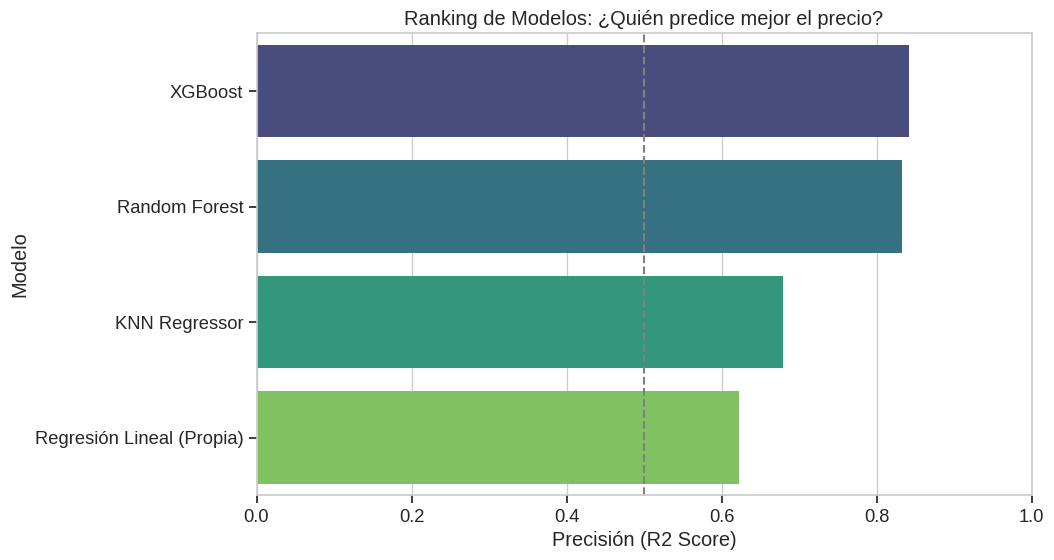

Tabla de resultados


,Modelo,R2 Score,RMSE ($)
3,XGBoost,0.842530,181735.999679
2,Random Forest,0.832905,187207.828105
1,KNN Regressor,0.678791,259559.105730
0,Regresión Lineal (Propia),0.622484,281391.157721


In [ ]:
#Modelos a probar
modelos_reg = {
    "Regresión Lineal (Propia)": LinearRegressionPropio(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=6),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
}

resultados_reg = []

print(" Entrenando modelos...")

for nombre, modelo in modelos_reg.items():

    modelo.fit(X_train_sc, y_train)
    y_pred = modelo.predict(X_test_sc)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    resultados_reg.append({
        "Modelo": nombre,
        "R2 Score": r2,
        "RMSE ($)": rmse
    })

#Tabla de resultados
df_resultados = pd.DataFrame(resultados_reg).sort_values(by="R2 Score", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="R2 Score", y="Modelo", data=df_resultados, palette="viridis")
plt.title("Ranking de Modelos: ¿Quién predice mejor el precio?")
plt.xlim(0, 1)
plt.xlabel("Precisión (R2 Score)")
plt.axvline(x=0.5, color='gray', linestyle='--')
plt.show()

print("Tabla de resultados")
display(df_resultados)

## Analsis del mejor modelo (XGBoost)

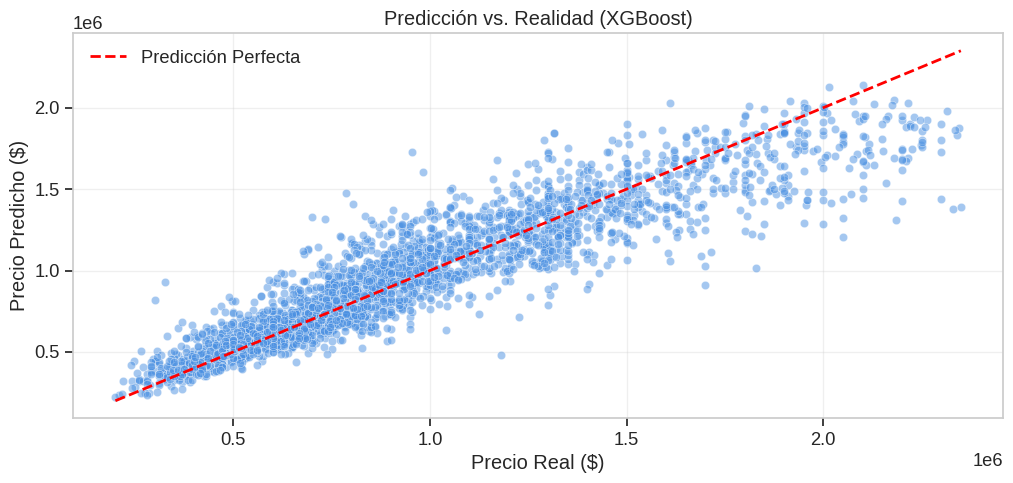

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="#4A90E2")

#Linea prediccion perfecta
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Predicción Perfecta')

plt.title("Predicción vs. Realidad (XGBoost)")
plt.xlabel("Precio Real ($)")
plt.ylabel("Precio Predicho ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

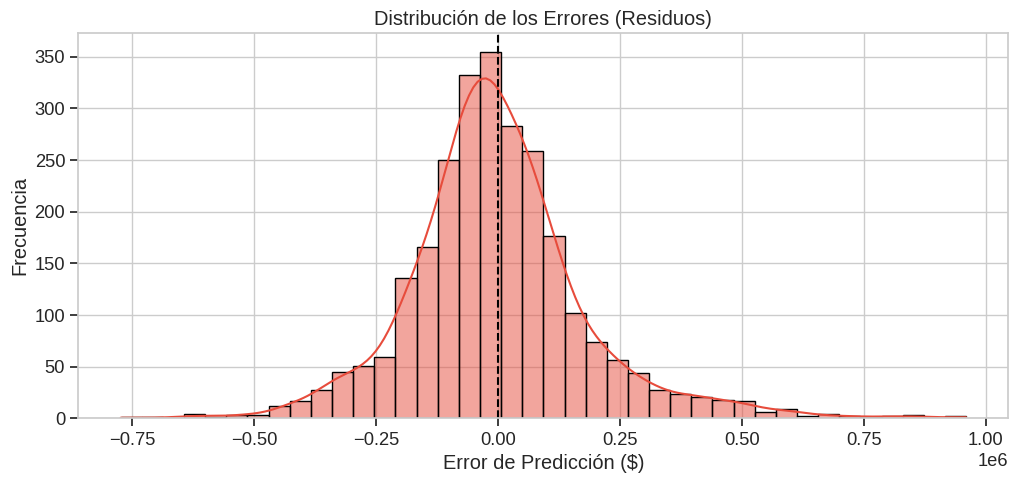

In [ ]:
plt.figure(figsize=(12, 5))
residuos = y_test - y_pred

sns.histplot(residuos, kde=True, bins=40, color="#E74C3C")
plt.title("Distribución de los Errores (Residuos)")
plt.xlabel("Error de Predicción ($)")
plt.ylabel("Frecuencia")
plt.axvline(0, color='black', linestyle='--') # Línea de cero error
plt.show()

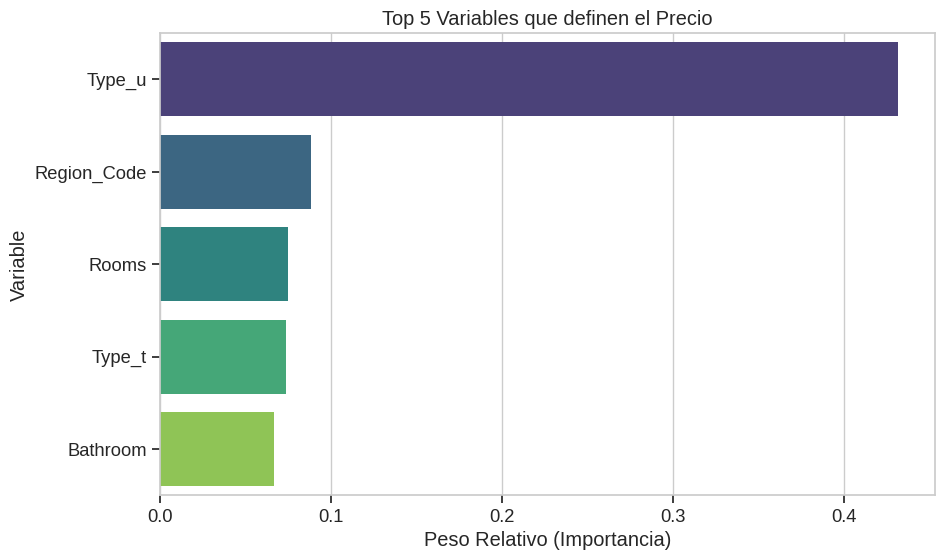

In [ ]:
plt.figure(figsize=(10, 6))
#Extraemos la importancia
mejor_modelo = modelos_reg["XGBoost"]
importancias = mejor_modelo.feature_importances_
df_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importancias})
df_imp = df_imp.sort_values('Importance', ascending=False).head(5) # Top 5

sns.barplot(x='Importance', y='Feature', data=df_imp, palette="viridis")
plt.title("Top 5 Variables que definen el Precio")
plt.xlabel("Peso Relativo (Importancia)")
plt.ylabel("Variable")
plt.show()

Validando estabilidad de XGBRegressor con 10 folds
Puntajes R2 individuales: [0.81428531 0.83502293 0.84157257 0.8547958  0.84259542 0.83498578
 0.84059906 0.83734764 0.83469668 0.82465596]
Promedio R2: 0.836
Desviación Estandar: 0.010


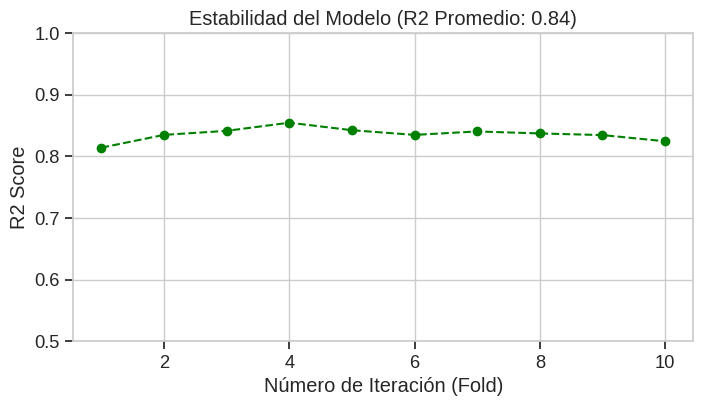

Conclusión: El modelo es muy estable y su rendimiento no depende de la suerte.


In [ ]:
#Validación cruzada
from sklearn.model_selection import cross_val_score

print(f"Validando estabilidad de {mejor_modelo.__class__.__name__} con 10 folds")

#R2 en 10 particiones
scores = cross_val_score(mejor_modelo, X_train_sc, y_train, cv=10, scoring='r2')

print(f"Puntajes R2 individuales: {scores}")
print(f"Promedio R2: {scores.mean():.3f}")
print(f"Desviación Estandar: {scores.std():.3f}")

# Gráfica de la estabilidad
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), scores, marker='o', linestyle='--', color='green')
plt.title(f'Estabilidad del Modelo (R2 Promedio: {scores.mean():.2f})')
plt.xlabel('Número de Iteración (Fold)')
plt.ylabel('R2 Score')
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.show()

if scores.std() < 0.05:
    print("Conclusión: El modelo es muy estable y su rendimiento no depende de la suerte.")
else:
    print("Conclusión: El modelo tiene cierta varianza, podría necesitar más datos.")

#Mdelos de clasificación

## Objetivos
Clasificar las propiedades inmobiliarias en dos segmentos de mercado ('Gama Alta' vs. 'Normal') mediante modelos de prendizaje supervisado, para automatizar la identificación de oportunidades de inversión premium.

Este objetivo se desglosa en tres metas específicas:

1. Segmentación binaria: Transformar la variable continua de precio en una variable categórica binaria (Clase 1: Lujo / Clase 0: Estándar) utilizando el percentil 75 como umbral de decisión.

2. Evaluación de exactitud: Comparar la eficacia de clasificadores KNN, Random Forest y XGBoost mediante métricas de desempeño como la Matriz de Confusión y la Curva ROC-AUC.

3. Detección de patrones de lujo: Determinar qué características específicas son las más influyentes para que una propiedad sea catalogada como "Gamma Alta" por el algoritmo.

## Comparacion de modelos

Umbral de Lujo definido en: $1,270,000
Entrenando clasificadores para predecir propiedades > $1,270,000...


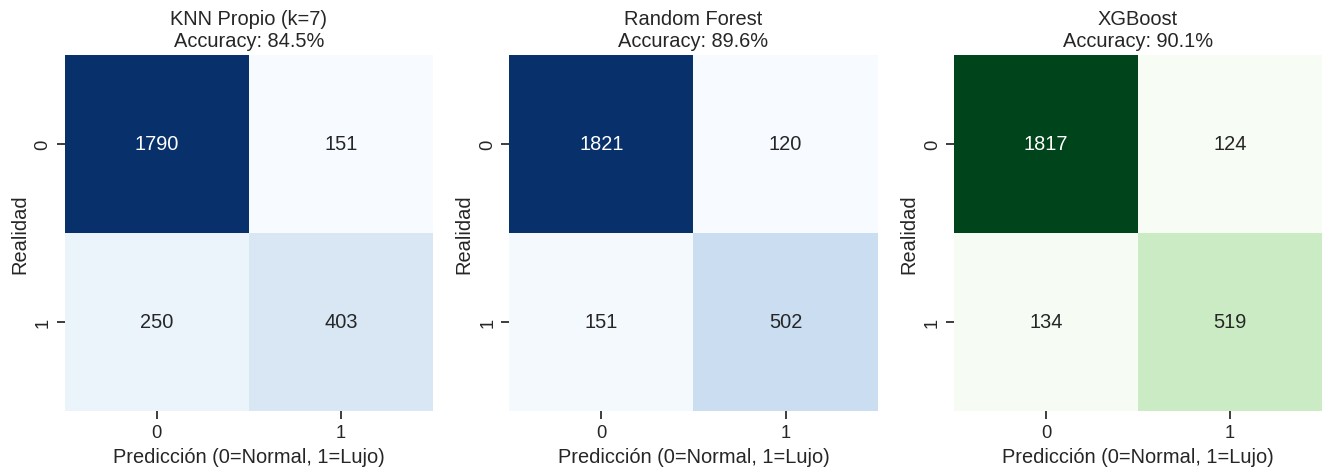

In [ ]:
#Umbral a partir de cuánto es Gama Alta
umbral_lujo = df_clean['Price'].quantile(0.75)
print(f"Umbral de Lujo definido en: ${umbral_lujo:,.0f}")

y_class = (df_clean['Price'] > umbral_lujo).astype(int)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

scaler_c = StandardScaler()
X_train_c_sc = scaler_c.fit_transform(X_train_c)
X_test_c_sc = scaler_c.transform(X_test_c)

#Metodos de clasificación
modelos_class = {
    "KNN Propio (k=7)": KNN_Classifier(k=7),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

plt.figure(figsize=(18, 5))
idx = 1

print(f"Entrenando clasificadores para predecir propiedades > ${umbral_lujo:,.0f}...")
for nombre, modelo in modelos_class.items():

    modelo.fit(X_train_c_sc, y_train_c)
    y_pred_c = modelo.predict(X_test_c_sc)
    acc = accuracy_score(y_test_c, y_pred_c)

    #Matriz de Confusión
    plt.subplot(1, 4, idx)
    sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues' if acc < 0.9 else 'Greens', cbar=False)
    plt.title(f"{nombre}\nAccuracy: {acc:.1%}")
    plt.xlabel('Predicción (0=Normal, 1=Lujo)')
    plt.ylabel('Realidad')
    idx += 1

plt.tight_layout()
plt.show()

## Analisis del mejor modelo (Random Forest)

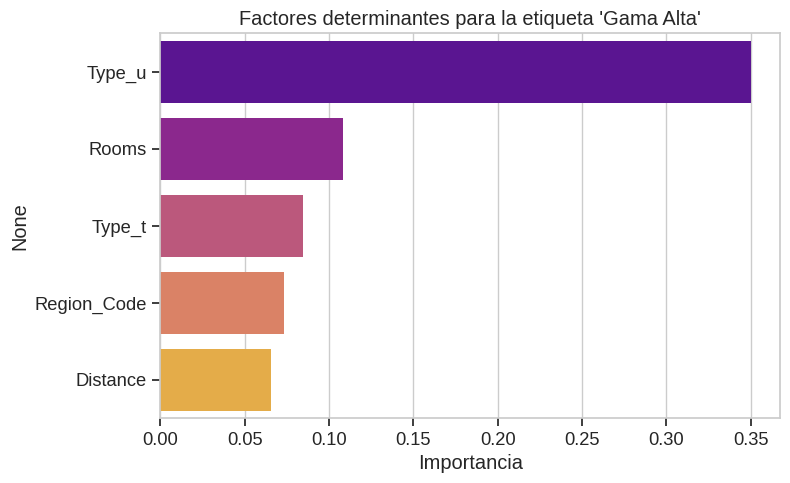

In [ ]:
#Qué hace que una casa sea de lujo?
rf_class = modelos_class["XGBoost"]

#Importancia de cada variable
imp_class = pd.Series(rf_class.feature_importances_, index=X.columns).sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=imp_class, y=imp_class.index, palette="plasma")
plt.title("Factores determinantes para la etiqueta 'Gama Alta'")
plt.xlabel("Importancia")
plt.show()

Validando estabilidad de XGBClassifier...
Resultados validacion cruzada
Accuracy promedio: 90.62%
Desviación estándar: 0.82%


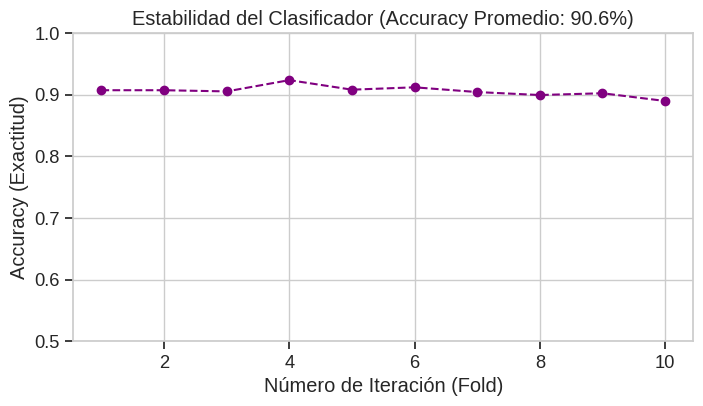

El modelo es estable y su rendimiento no depende de la suerte


In [ ]:
from sklearn.model_selection import cross_val_score
#Validacion cruzada
#Seleccionamos el mejor modelo
mejor_clasificador = modelos_class["XGBoost"]

print(f"Validando estabilidad de {mejor_clasificador.__class__.__name__}...")
scores_class = cross_val_score(mejor_clasificador, X_train_c_sc, y_train_c, cv=10, scoring='accuracy')

print(f"Resultados validacion cruzada")
print(f"Accuracy promedio: {scores_class.mean():.2%}")
print(f"Desviación estándar: {scores_class.std():.2%}")

#Grafica de la estabilidad
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), scores_class, marker='o', linestyle='--', color='purple')
plt.title(f'Estabilidad del Clasificador (Accuracy Promedio: {scores_class.mean():.1%})')
plt.xlabel('Número de Iteración (Fold)')
plt.ylabel('Accuracy (Exactitud)')
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.show()

if scores_class.mean() > 0.85 and scores_class.std() < 0.05:
    print("El modelo es estable y su rendimiento no depende de la suerte")
else:
    print("El modelo varía mucho dependiendo de los datos")

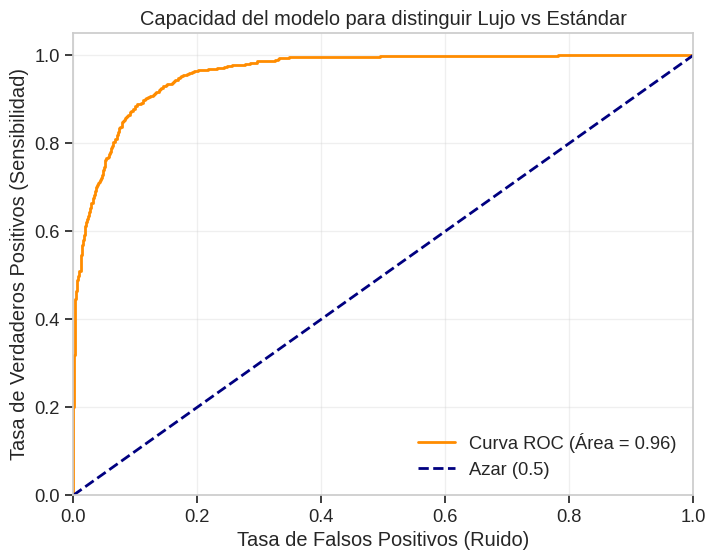

In [ ]:
#CURVA ROC - AUC
from sklearn.metrics import roc_curve, auc

#Obtener probabilidades (no solo ceros y unos, sino la confianza del modelo)
#.predict_proba devuelve dos columnas: [Prob_Clase0, Prob_Clase1]
#os interesa la columna 1 (Probabilidad de ser Lujo)
y_probs = mejor_clasificador.predict_proba(X_test_c_sc)[:, 1]

#Calcular puntos de la curva
fpr, tpr, _ = roc_curve(y_test_c, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (Área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (Ruido)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Capacidad del modelo para distinguir Lujo vs Estándar')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Clustering geografico

## Objetivos

1. Ignorar los nombres administrativos de los barrios y agrupar las propiedades basándose puramente en su ubicación física (Coordenadas) y su valor de mercado (Precio).

2. Identificar clústeres geográficos que comparten niveles de precios similares, revelando zonas de alta plusvalía, de oportunidad o de vivienda accesible.

3. Detección de propiedades atípicas usando algoritmos basados en densidad (DBSCAN) para diferenciar entre áreas residenciales consolidadas (alta densidad) y propiedades atípicas o aisladas que no siguen el comportamiento estándar del mercado.

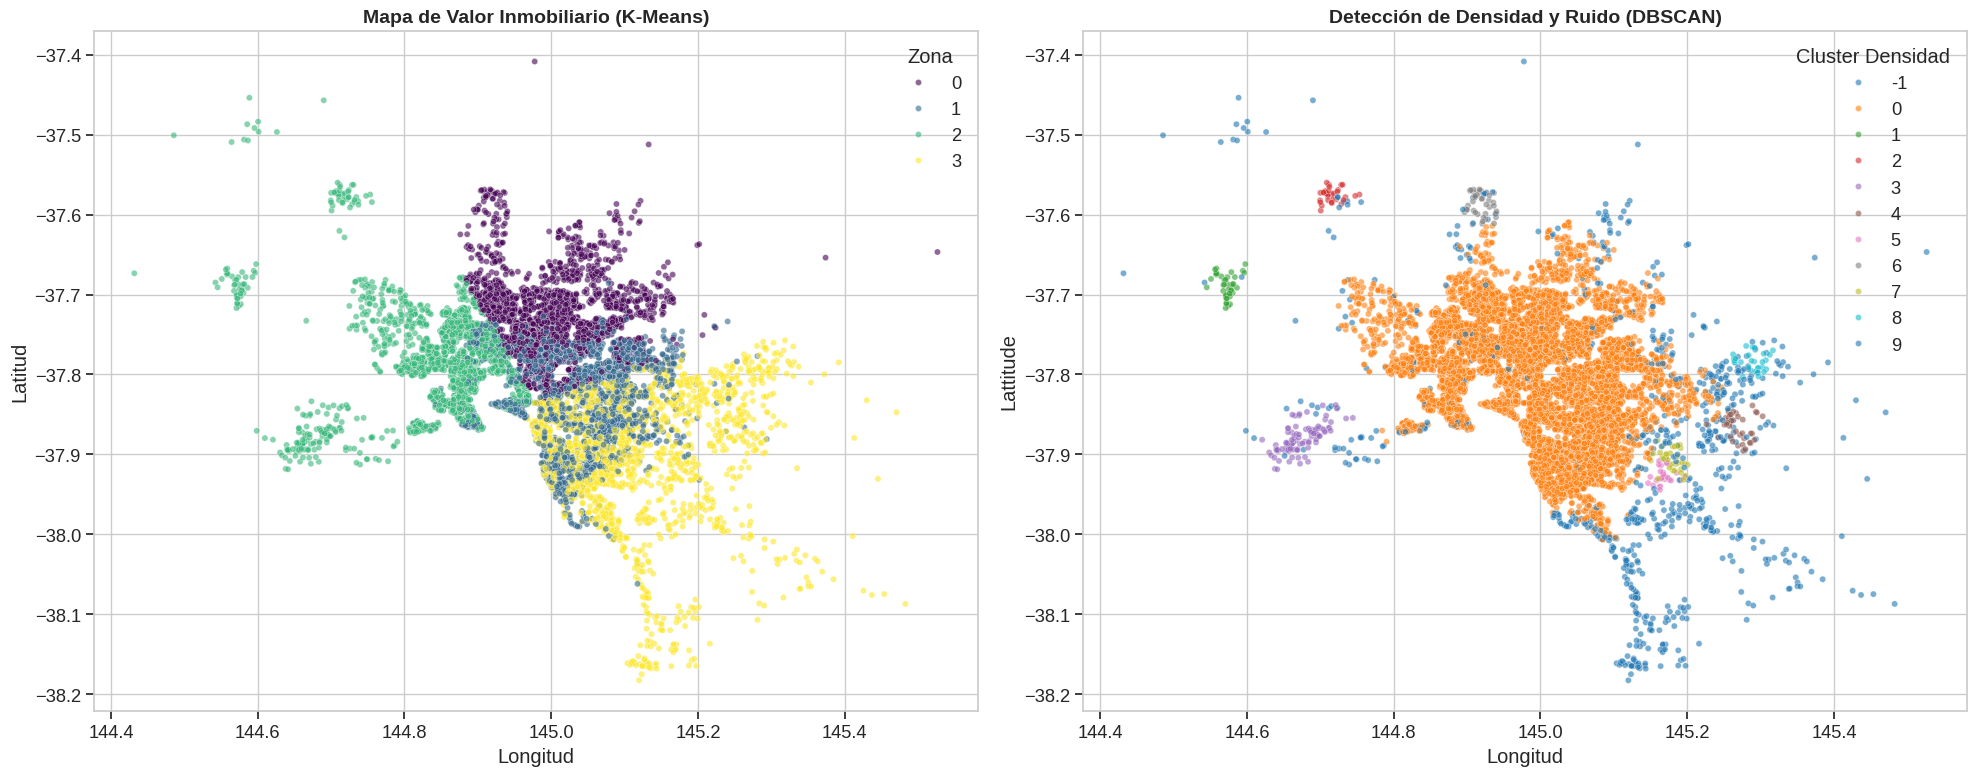

Conclusión Parte 1: K-Means dividió la ciudad en franjas económicas claras
DBSCAN detectó las propiedades periféricas (Ruido).


In [ ]:
X_geo = df_clean[['Lattitude', 'Longtitude', 'Price']].copy()
X_geo_sc = StandardScaler().fit_transform(X_geo)

#K-Means (Para encontrar zonas definidas)
#Probamos con 4 zonas comerciales distintas
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['Cluster_Zone'] = kmeans.fit_predict(X_geo_sc)

#DBSCAN (Para encontrar densidad y ruido)
#eps=0.3: Radio de vecindad
#min_samples=20: Necesitamos al menos 20 casas para considerar que es un "barrio"
dbscan = DBSCAN(eps=0.3, min_samples=20)
df_clean['Cluster_Density'] = dbscan.fit_predict(X_geo_sc)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Mapa A: Zonas K-Means
sns.scatterplot(x='Longtitude', y='Lattitude', hue='Cluster_Zone',
                data=df_clean, palette='viridis', s=20, alpha=0.6, ax=ax[0])
ax[0].set_title('Mapa de Valor Inmobiliario (K-Means)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Longitud')
ax[0].set_ylabel('Latitud')
ax[0].legend(title='Zona')

# Mapa B: Densidad DBSCAN
sns.scatterplot(x='Longtitude', y='Lattitude', hue='Cluster_Density',
                data=df_clean, palette='tab10', s=20, alpha=0.6, ax=ax[1])
ax[1].set_title('Detección de Densidad y Ruido (DBSCAN)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Longitud')
ax[1].legend(title='Cluster Densidad')

plt.tight_layout()
plt.show()

print("Conclusión Parte 1: K-Means dividió la ciudad en franjas económicas claras")
print("DBSCAN detectó las propiedades periféricas (Ruido).")

# Clustering de tipos

## Objetivos
1. Utilizar un algoritmo diseñado específicamente para datos categóricos (K-Modas) para encontrar los "perfiles tipo" de vivienda en Melbourne ("Departamento Urbano" vs. "Casa Familiar").

2. Caracterización del Mercado: Analizar las diferencias de precio y composición física entre los grupos encontrados para entender qué define a cada segmento.

In [ ]:
df_kmodes = df_clean.copy()

def decode_type(row):
    if row.get('Type_t') == 1: return 'Townhouse'
    if row.get('Type_u') == 1: return 'Unit/Apt'
    return 'House'

df_kmodes['Type_Real'] = df_kmodes.apply(decode_type, axis=1)

#Selección de Variables Categóricas
cols_interes = ['Region_Code', 'Rooms', 'Bathroom', 'Car', 'Type_Real']
X_cat = df_kmodes[cols_interes].astype(str).values

k = 3
km = KModes_Custom(k=k, max_iters=20, random_state=42)
km.fit(X_cat)

#Asignación de Etiquetas
df_kmodes['Cluster_Profile'] = km.labels_
print("Modelo entrenado y perfiles asignados.")

-> Convergencia alcanzada en iteración 2
Modelo entrenado y perfiles asignados.


In [ ]:
print("\n" + "="*50)
print("PERFILES TÍPICOS (Centroides / Modas)")
print("="*50)

# Tabla de Centroides
df_centroids = pd.DataFrame(km.centroids, columns=cols_interes)
df_centroids.index = [f'Cluster {i}' for i in range(km.k)]
display(df_centroids)

# Precios Promedio
print("\n Precio Promedio por Perfil:")
precio_prom = df_kmodes.groupby('Cluster_Profile')['Price'].mean().apply(lambda x: f"${x:,.2f}")
print(precio_prom)


PERFILES TÍPICOS (Centroides / Modas)


,Region_Code,Rooms,Bathroom,Car,Type_Real
Cluster 0,5,4,2.0,2.0,House
Cluster 1,5,2,1.0,1.0,Unit/Apt
Cluster 2,2,3,1.0,1.0,House



 Precio Promedio por Perfil:
Cluster_Profile
0    $1,229,792.99
1      $642,224.91
2      $959,946.34
Name: Price, dtype: object


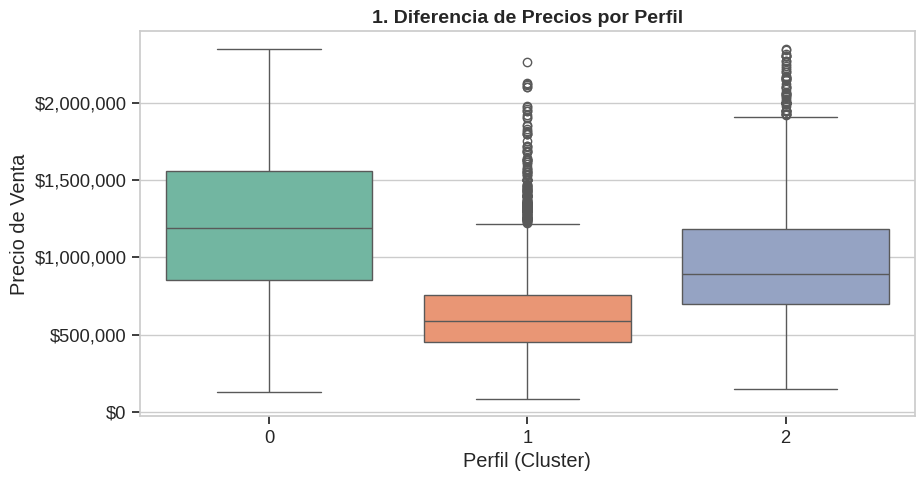

In [ ]:
plt.figure(figsize=(10, 5))
colors = sns.color_palette("Set2", k)

sns.boxplot(x='Cluster_Profile', y='Price', data=df_kmodes, palette=colors)

plt.title('1. Diferencia de Precios por Perfil', fontsize=14, fontweight='bold')
plt.xlabel('Perfil (Cluster)')
plt.ylabel('Precio de Venta')

# Formato de dinero en el eje Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))

plt.show()

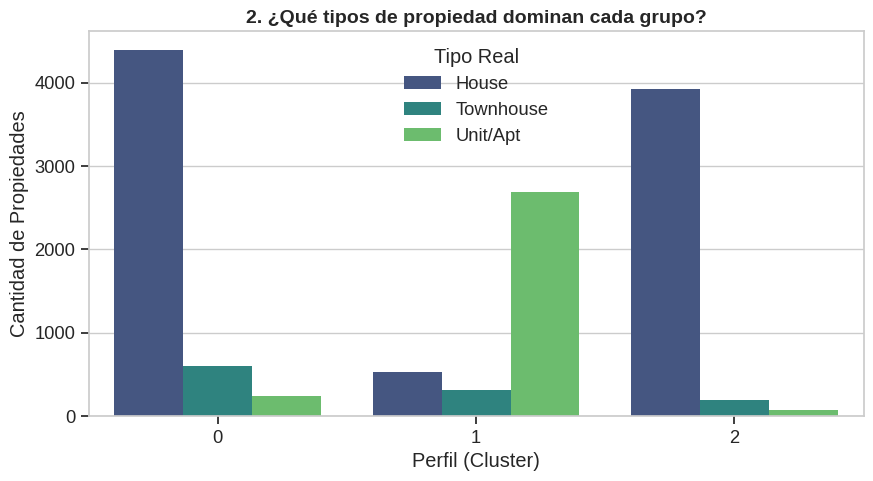

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster_Profile', hue='Type_Real', data=df_kmodes, palette='viridis')

plt.title('2. ¿Qué tipos de propiedad dominan cada grupo?', fontsize=14, fontweight='bold')
plt.xlabel('Perfil (Cluster)')
plt.ylabel('Cantidad de Propiedades')
plt.legend(title='Tipo Real')

plt.show()

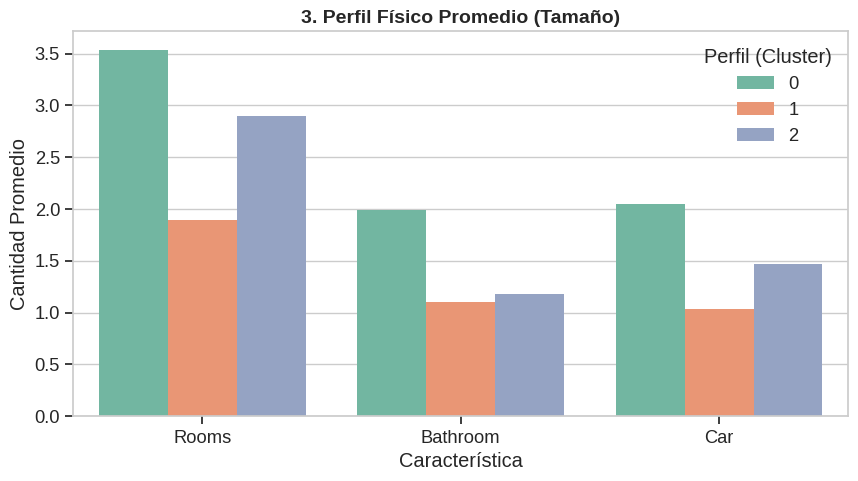

In [ ]:
plt.figure(figsize=(10, 5))
cols_fisicas = ['Rooms', 'Bathroom', 'Car']
temp_df = df_kmodes.copy()

#Convertimos a float para poder sacar promedios (ya que en K-Modes eran strings)
for c in cols_fisicas:
    temp_df[c] = temp_df[c].astype(float)

resumen = temp_df.groupby('Cluster_Profile')[cols_fisicas].mean().reset_index()
resumen_melt = pd.melt(resumen, id_vars=['Cluster_Profile'], value_vars=cols_fisicas,
                       var_name='Característica', value_name='Promedio')

sns.barplot(x='Característica', y='Promedio', hue='Cluster_Profile', data=resumen_melt, palette=colors)

plt.title('3. Perfil Físico Promedio (Tamaño)', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad Promedio')
plt.legend(title='Perfil (Cluster)')

plt.show()

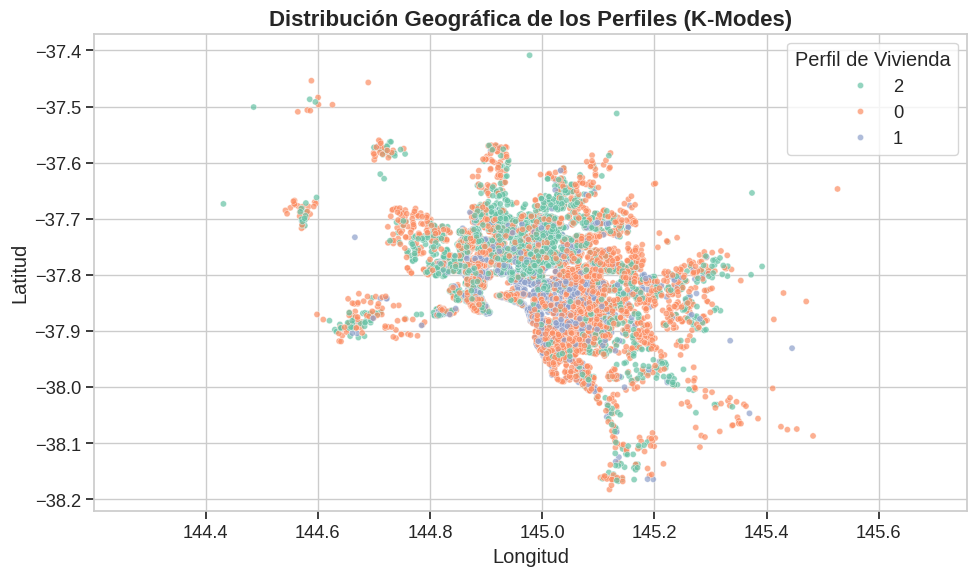

In [ ]:
#Distribucion geografica de los perfiles
plt.figure(figsize=(10, 6))

df_kmodes['Cluster_Profile'] = df_kmodes['Cluster_Profile'].astype(str)
colores_mapa = sns.color_palette("Set2", n_colors=k)

# Generamos el Mapa
sns.scatterplot(
    data=df_kmodes,
    x='Longtitude',
    y='Lattitude',
    hue='Cluster_Profile',
    palette=colores_mapa,
    s=20,
    alpha=0.7,
)

plt.title('Distribución Geográfica de los Perfiles (K-Modes)', fontsize=16, fontweight='bold')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Perfil de Vivienda', loc='upper right', frameon=True)

# Ajustar proporciones para que el mapa no se vea estirado
plt.axis('equal')
plt.tight_layout()
plt.show()

# Series de tiempo

##Preprocesamos los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA



#Almacenamos la información en un dataframe
df= pd.read_csv('melb_data.csv')

#Casteamos la columna de fechas de String a date
df['Date']= pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

#Eliminamos faltantes y ordenamos cronologicamente
df= df.dropna(subset=['Date']).sort_values('Date')

#Agrupamos por mes y calculamos el precio promedio
serie = df.set_index('Date').resample('M').agg({'Price': 'mean'})

#Completamos la información faltante de precio con interpolación
serie['Price'] = serie['Price'].interpolate(method='linear')

display(serie.head())


,Price
Date,
2016-01-31,1.009000e+06
2016-02-29,9.081827e+05
2016-03-31,9.521130e+05
2016-04-30,9.960432e+05
2016-05-31,1.046063e+06


##Visualizamos la serie de tiempo

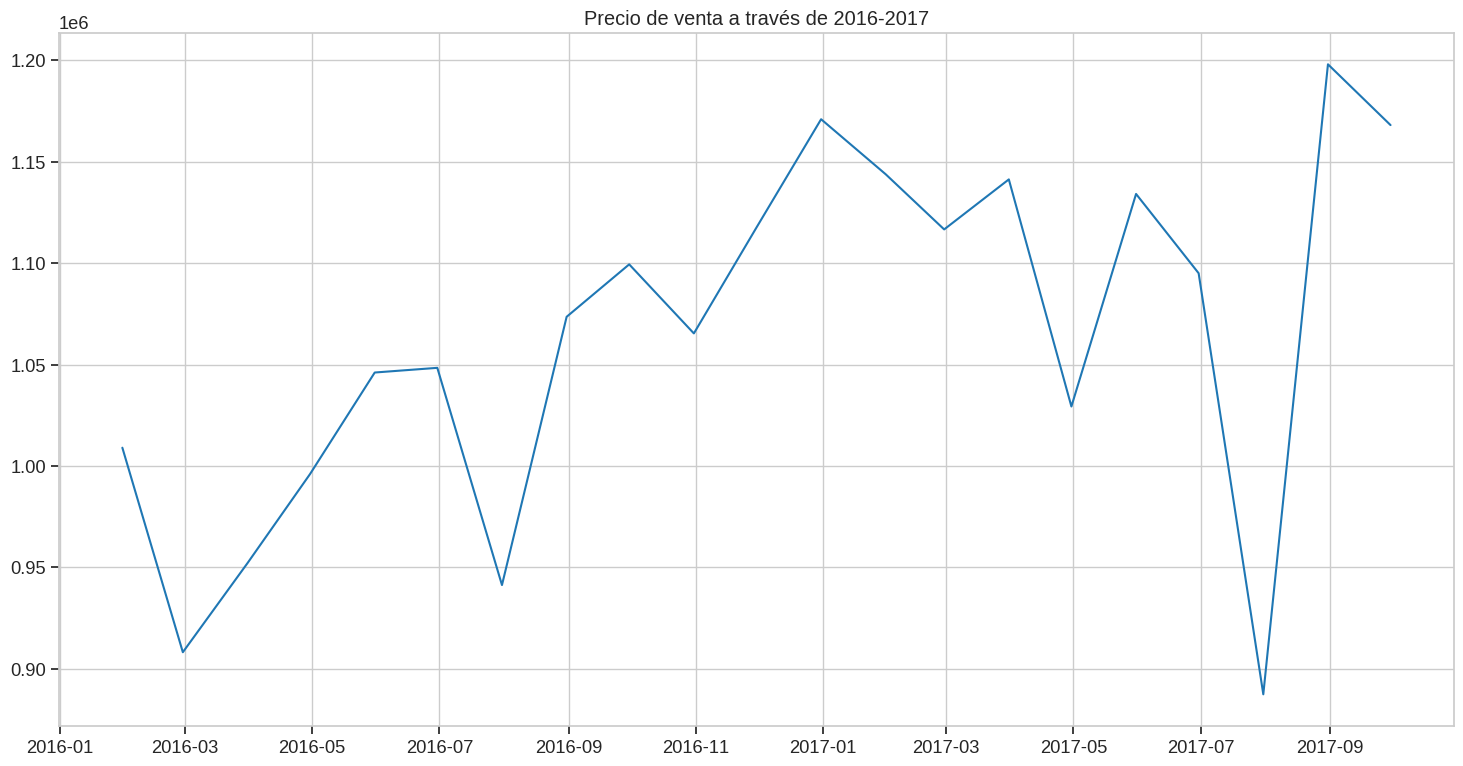

In [ ]:
plt.figure(figsize=(18,9))
plt.title("Precio de venta a través de 2016-2017")
plt.plot(serie.Price)
plt.show()

##Verificamos el grado de autocorrelación para analizar qué tan buena memoria tiene nuestro modelo

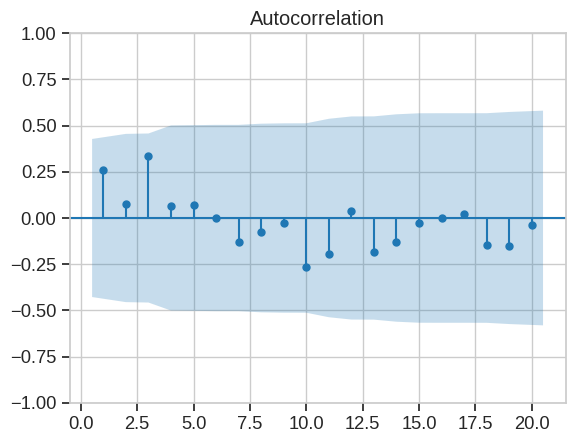

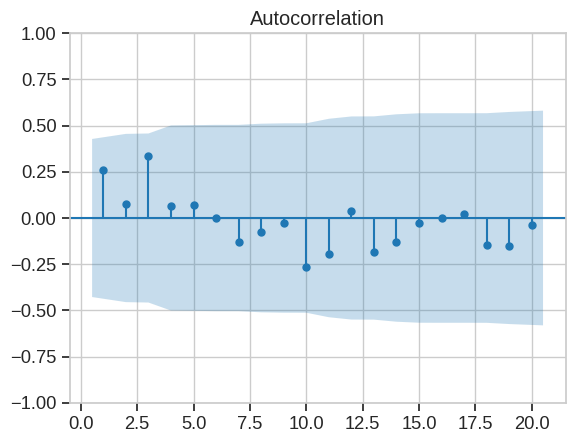

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(serie.Price, lags=range(1,21), alpha= 0.05)

Básicamente vemos que el precio actual no se explica con los precios anteriores, la correlación es muy baja esto es entendible dada la poca cantidad de información, no es porible encontrar el patrón.

##Verificamos tendencia con ayuda de la media movil

In [ ]:
from sklearn.metrics import mean_absolute_error

def plot_moving_average(serie, window, intervalos = False, escala = 2, anomalies = False):
    rolling_mean = serie.rolling(window = window).mean()
    plt.figure(figsize = (12, 5))
    plt.plot(rolling_mean, label = 'Tendencia por media móvil')
    plt.title('Media móvil \n Tamaño de ventana: {}'.format(window))
    if intervalos:
        mae = mean_absolute_error(serie[window:], rolling_mean[window:])
        std = np.std(serie[window:] - rolling_mean[window:])
        low_ = rolling_mean - (mae + escala*std)
        upp_ = rolling_mean + (mae + escala*std)
        plt.plot(upp_, 'r--', label = 'Límites')
        plt.plot(low_, 'r--')
        if anomalies:
            anoms = pd.DataFrame(index = serie.index, columns = serie.columns)
            anoms[serie<low_] = serie[serie<low_]
            anoms[serie>upp_] = serie[serie>upp_]
            plt.plot(anoms, 'ro', markersize = 10)
    plt.plot(serie[window:], label = 'Valores reales')
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.show()

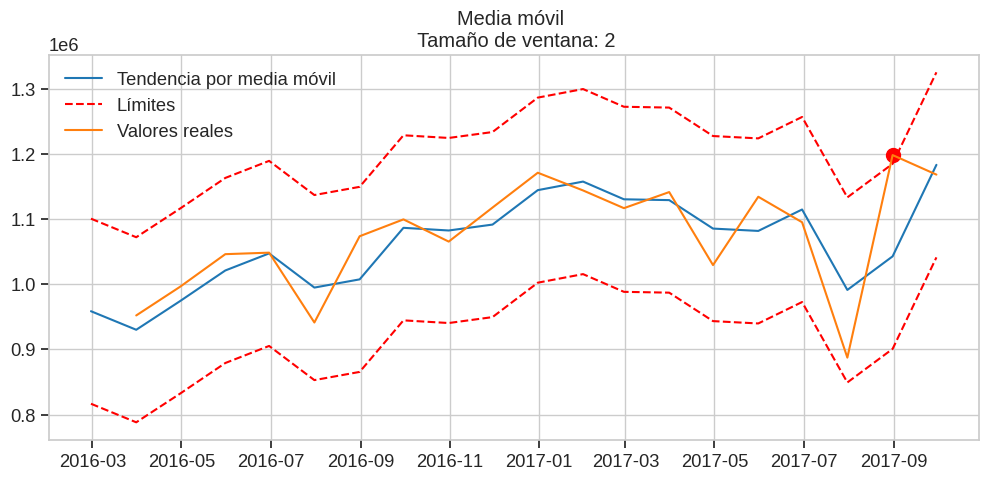

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plot_moving_average(serie, 2, intervalos = True, anomalies = True)

Graficamente se aprecia una tendencia al alza.

Usamos como ventana dos meses dado que nuestro modelo tiene muy mal desempeño con ventanas más amplias. Detectamos una anomalía en septiembre,

##Aplicamos suavizado exponencial

Intentamos pronosticar los siguientes 10 meses a partir de la fecha en que finalizan los datos

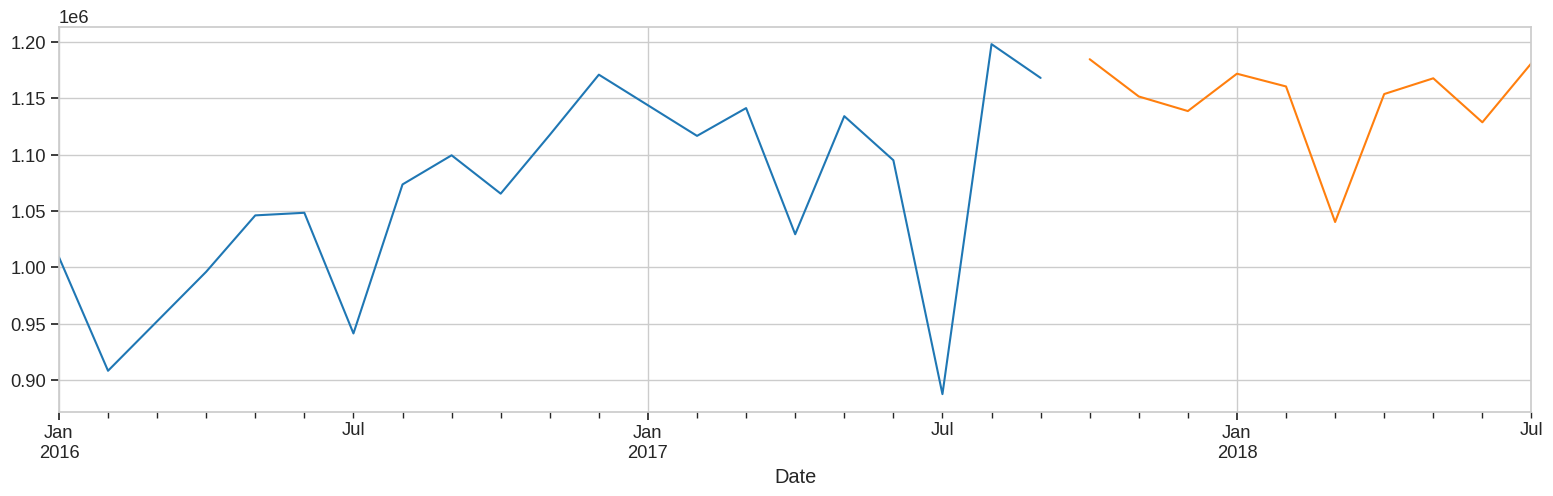

In [ ]:

from statsmodels.tsa.api import ExponentialSmoothing

#Gráfica
def plot_exp_smoothing(serie, alpha, periodo = 10):
    ses=ExponentialSmoothing((serie), seasonal_periods = periodo, trend = 'add',
                            seasonal = 'add').fit()
    #pronostico

    ses_pred = ses.forecast(len(serie)//2)
    serie.plot(kind = 'line', figsize = (19,5))
    ses_pred.plot(kind = 'line')

plot_exp_smoothing(serie.Price, 0.7)

##Comparamos los resultados de 2 modelos:


-Holt Winters (suavizado exponencial)


-Regresión lineal

Error MAPE de Holt-Winters: 10.05%


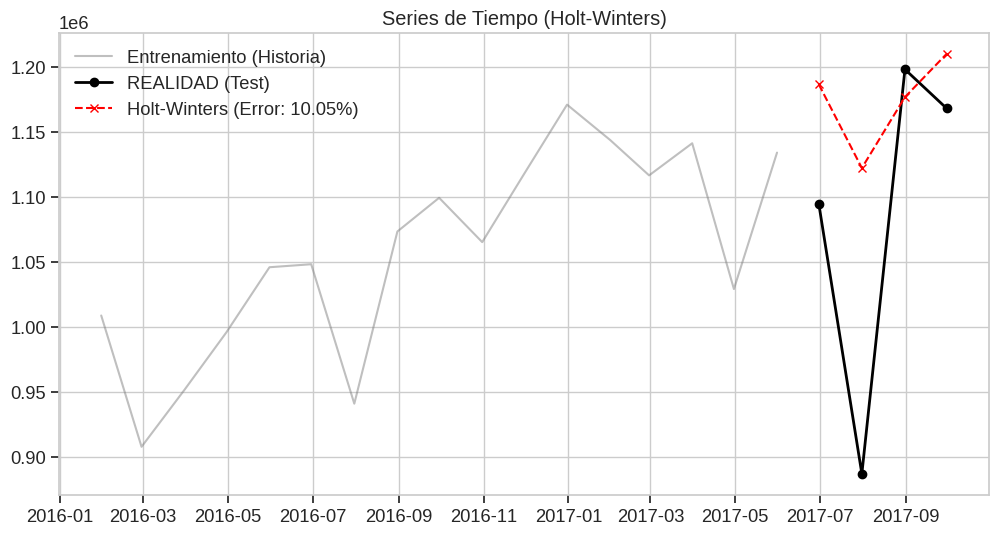

In [ ]:
#Holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import pandas as pd

#Dividimos los datos
n_test = 4
train = serie['Price'].iloc[:-n_test]
test = serie['Price'].iloc[-n_test:]

#Entrenamos el modelo
modelo_hw = ExponentialSmoothing(train,
                                 seasonal_periods=6,
                                 trend='add',
                                 seasonal='add').fit()

#Generamos el pronóstico
hw_pred = modelo_hw.forecast(len(test))

#Evaluamos
error_hw = mean_absolute_percentage_error(test, hw_pred) * 100
print(f"Error MAPE de Holt-Winters: {error_hw:.2f}%")


plt.figure(figsize=(12, 6))

#Datos Reales
plt.plot(train.index, train, label='Entrenamiento (Historia)', color='gray', alpha=0.5)
plt.plot(test.index, test, label='REALIDAD (Test)', color='black', linewidth=2, marker='o')

#Predicción Holt-Winters
plt.plot(test.index, hw_pred, label=f'Holt-Winters (Error: {error_hw:.2f}%)', color='red', linestyle='--', marker='x')


plt.title('Series de Tiempo (Holt-Winters)')
plt.legend()
plt.grid(True)
plt.show()

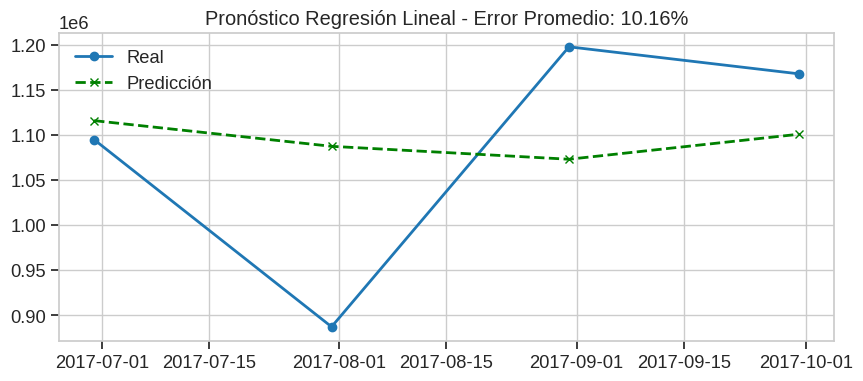

Pesos del modelo (Importancia de mes anterior, hace 2 meses, hace 3 meses):
[0.19233319 0.10110034 0.28185197]


In [ ]:
#Regresión lineal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error


data = serie.copy()
data.columns = ['y']

#Generamos los lags
for i in range(1, 4):
    data['lag_{}'.format(i)] = data.y.shift(i)

#Eliminamos los primeros 3 meses que quedaron vacíos por los lags
data = data.dropna()

#Definimos X e y
y = data.y
X = data.drop(['y'], axis=1)

#Dividimos en conjunto de entrenamiento y pruebas
def timeseries_train_test_split(X, y, test_size):
    # Calculamos el índice de corte
    test_index = int(len(X) * (1 - test_size))

    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    return X_train, X_test, y_train, y_test

#Usamos 4 meses para que concuerde con los modelos anteriores
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.20)


#Entrenamos el modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

#Presentamos los resultados
def plot_tsm(modelo, X_test, y_test):

    y_pred = modelo.predict(X_test)
    error = mean_absolute_percentage_error(y_test, y_pred) * 100

    plt.figure(figsize=(10, 4))
    # Graficamos Realidad
    plt.plot(y_test.index, y_test.values, label='Real', linewidth=2, marker='o')
    # Graficamos Predicción
    plt.plot(y_test.index, y_pred, 'g--', label='Predicción', linewidth=2, marker='x')

    plt.title('Pronóstico Regresión Lineal - Error Promedio: {:.2f}%'.format(error))
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Mostramos los coeficientes para ver qué mes pasado pesa más
    print("Pesos del modelo (Importancia de mes anterior, hace 2 meses, hace 3 meses):")
    print(modelo.coef_)
plot_tsm(lr, X_test, y_test)